In [4]:
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from keras.layers import UpSampling2D, Conv2DTranspose, Reshape
from keras.models import Input, Model, Sequential, load_model
from keras.datasets.mnist import load_data
import numpy as np
import h5py

In [5]:
X, y = load_data()
X = X[0]
z = X

X = X/255
z = z/255

X = X[:, np.newaxis, :, :]

x_train = Input(shape=(1, 28, 28))

In [6]:
encoder = Sequential()
encoder.add(Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(1, 28, 28)))
encoder.add(MaxPool2D((2, 2), 2, dim_ordering='th'))
encoder.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
encoder.add(MaxPool2D((2, 2), 2, dim_ordering='th'))
encoder.add(Flatten())
encoder.add(Dense(64, activation='relu'))

encoded = encoder(x_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), 2, data_format="channels_first")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), 2, data_format="channels_first")`
  """


In [7]:
decoder = Sequential()
decoder.add(Reshape(target_shape=(-1, 8, 8), input_shape=(64,)))
decoder.add(Conv2DTranspose(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2DTranspose(16, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Flatten())
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape(target_shape=(28, 28)))
encoder.summary()
decoder.summary()
decoded = decoder(encoded)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 14, 16)         4048      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 4, 32)          2336      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
Total params: 8,496
Trainable params: 8,496
Non-trainable params: 0
_________________________________________________________________
________

In [8]:
autoencoder = Model(x_train, decoded)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64)                8496      
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28)            3732096   
Total params: 3,740,592
Trainable params: 3,740,592
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X, z, epochs=10, validation_split=0.2, batch_size=1024)

autoencoder.save('auto.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.3855 - val_loss: 0.2631
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2542 - val_loss: 0.2412
Epoch 3/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.2255 - val_loss: 0.2092
Epoch 4/10
48000/48000 [==============================] - 74s 2ms/step - loss: 0.1957 - val_loss: 0.1847
Epoch 5/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1773 - val_loss: 0.1711
Epoch 6/10
48000/48000 [==============================] - 74s 2ms/step - loss: 0.1660 - val_loss: 0.1620
Epoch 7/10
48000/48000 [==============================] - 74s 2ms/step - loss: 0.1575 - val_loss: 0.1549
Epoch 8/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.1505 - val_loss: 0.1483
Epoch 9/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.1449 - val_loss: 0.1435
Epoch

In [10]:
## Generating

x_test = y[0]
x_test = x_test/255
x_test = x_test[:, np.newaxis, :, :]

generatedImg = autoencoder.predict(x_test)

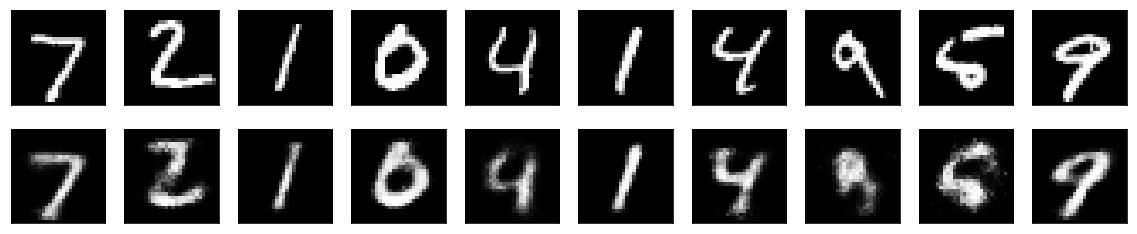

In [17]:


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #displaying original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(y[0][i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #displaying predictions
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(generatedImg[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() 